# Loading Packages and Datasets

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import os
import scvelo as scv
import harmonypy as hm
from matplotlib.pyplot import rc_context
import re
import seaborn as sns

In [2]:
sc.settings.set_figure_params(dpi=150,fontsize=8) #change global figure resolution


In [3]:
datapath = r"/nfs_master/prakrithi/abhay/testis_allfiles/" # make sure to put the 'r' in front

In [4]:
results_dir = '/nfs_master/prakrithi/abhay/testis_scripts/results_Nov25/script1_preprocessing/'

In [5]:
#load all dataset

#GSE112013: https://www.nature.com/articles/s41422-018-0099-2 (2018, testis atlas)
donor1_r1 = sc.read_h5ad(datapath+'GSE112013_SRR6860519_Donor1_rep1.h5ad')
donor1_r2 = sc.read_h5ad(datapath+'GSE112013_SRR6860520_Donor1_rep2.h5ad')
donor2_r1 = sc.read_h5ad(datapath+'GSE112013_SRR6860521_Donor2_rep1.h5ad')
donor2_r2 = sc.read_h5ad(datapath+'GSE112013_SRR6860522_Donor2_rep2.h5ad')
donor3_r1 = sc.read_h5ad(datapath+'GSE112013_SRR6860523_Donor3_rep1.h5ad')
donor3_r2 = sc.read_h5ad(datapath+'GSE112013_SRR6860524_Donor3_rep2.h5ad')

#GSE153947: https://www.sciencedirect.com/science/article/pii/S2666379121002536 (2020, Cryptozoospermic men)
normal_1 = sc.read_h5ad(datapath+'GSE153947_SRR12164933_Normal_1.h5ad')
normal_2 = sc.read_h5ad(datapath+'GSE153947_SRR12164934_Normal_2.h5ad')
normal_3 = sc.read_h5ad(datapath+'GSE153947_SRR12164935_Normal_3.h5ad')
crypto_1 = sc.read_h5ad(datapath+'GSE153947_SRR12164936_Crypto_1.h5ad')
crypto_2 = sc.read_h5ad(datapath+'GSE153947_SRR12164937_Crypto_2.h5ad')
crypto_3 = sc.read_h5ad(datapath+'GSE153947_SRR12164938_Crypto_3.h5ad')

#GSE154535
donor1_iNOA = sc.read_h5ad(datapath+'GSE154535_SRR12234210_Donor1_iNOA.h5ad')
donor2_iNOA = sc.read_h5ad(datapath+'GSE154535_SRR12234211_Donor2_iNOA.h5ad')
donor3_iNOA = sc.read_h5ad(datapath+'GSE154535_SRR12234212_Donor3_iNOA.h5ad')
donor_OA    = sc.read_h5ad(datapath+'GSE154535_SRR12234213_Donor_OA.h5ad')



In [6]:
adata=donor1_r1.concatenate(donor1_r2,donor2_r1,donor2_r2,donor3_r1,donor3_r2,
                            normal_1,normal_2,normal_3,crypto_1,crypto_2,crypto_3,
                            donor1_iNOA, donor2_iNOA, donor3_iNOA, donor_OA,
                            join="outer",
                            batch_categories=['Donor1_r1', 'Donor1_r2', 'Donor2_r1',
                                              'Donor2_r2', 'Donor3_r1', 'Donor3_r2',
                                              'Normal_1' , 'Normal_2',  'Normal_3',
                                              'Crypto_1' , 'Crypto_2',  'Crypto_3',
                                              'iNOA_1', 'iNOA_2', 'iNOA_3', 'OA'],
                           batch_key = "samples")

In [7]:
adata

AnnData object with n_obs × n_vars = 113377 × 58389
    obs: 'samples'

In [8]:
df = adata.to_df()

In [9]:
df

,(CATTC)n,(GAATG)n,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,ZYG11B,ZYX,ZYXP1,ZZEF1,Zaphod,Zaphod2,Zaphod3,hAT-16_Crp,hAT-N1_Mam,hsa-mir-1253
AAACCTGAGAAACCTA-1-Donor1_r1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,0.0
AAACCTGAGAAAGTGG-1-Donor1_r1,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACAAAGG-1-Donor1_r1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTGGGT-1-Donor1_r1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGATCCTGT-1-Donor1_r1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCAAGATCC-1-OA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTAGTGTACTC-1-OA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTGTCATCGGC-1-OA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGACTTGAA-1-OA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Add metadata for TE elements

In [10]:
#load list of human TEs
all_te = pd.read_csv('/nfs_master/prakrithi/abhay/testis_scripts/extra_files/all_TE.csv')

In [11]:
all_te = all_te['All_TEs'].tolist()


In [12]:
gene_list = list(adata.var.index)


In [13]:
te_list = list(set(all_te).intersection(gene_list))

In [14]:
Alu  = list(filter(lambda x:'Alu' in x, te_list))
AluY = list(filter(lambda x:'AluY' in x, te_list))
L1   = list(filter(lambda x:'L1' in x, te_list))
LINE = list(filter(lambda x:'LINE' in x, te_list))
LTR  = list(filter(lambda x:'LTR' in x, te_list))
SVA  = list(filter(lambda x:'SVA' in x, te_list))


In [15]:
adata.obs['percent_TE']   = np.sum(adata[:, te_list].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_Alu']  = np.sum(adata[:, Alu].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_AluY'] = np.sum(adata[:, AluY].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_L1']   = np.sum(adata[:, L1].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_LINE'] = np.sum(adata[:, LINE].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_LTR']  = np.sum(adata[:, LTR].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['percent_SVA']  = np.sum(adata[:, SVA].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

In [16]:
#adata.var

In [17]:
#adata[:,Alu].var

In [18]:
len(Alu)

34

In [19]:
adata

AnnData object with n_obs × n_vars = 113377 × 58389
    obs: 'samples', 'percent_TE', 'percent_Alu', 'percent_AluY', 'percent_L1', 'percent_LINE', 'percent_LTR', 'percent_SVA'

# Doublet Removal

In [20]:
counts_matrix = adata.X
genes = adata.var_names
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                         min_cells=3,
                                                         min_gene_variability_pctl=85,
                                                         n_prin_comps=30)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.82
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 492.0 seconds


In [21]:
scrub.call_doublets(threshold=0.25)
adata.obs['doublet']=doublet_scores
adata.obs['predicted']=predicted_doublets
scrub.plot_histogram();
adata = adata[adata.obs['doublet'] < 0.25, :]

Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 13.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.9%


In [22]:
adata.obs

,samples,percent_TE,percent_Alu,percent_AluY,percent_L1,percent_LINE,percent_LTR,percent_SVA,doublet,predicted
AAACCTGAGAAACCTA-1-Donor1_r1,Donor1_r1,0.310769,0.215581,0.034718,0.043784,0.000100,0.007920,0.001893,0.070411,False
AAACCTGAGAAAGTGG-1-Donor1_r1,Donor1_r1,0.158619,0.110893,0.012914,0.020307,0.000094,0.001591,0.001778,0.050003,False
AAACCTGAGACAAAGG-1-Donor1_r1,Donor1_r1,0.088608,0.070323,0.002813,0.004219,0.000000,0.000000,0.000000,0.026516,False
AAACCTGAGACTGGGT-1-Donor1_r1,Donor1_r1,0.131544,0.100671,0.005369,0.005369,0.000000,0.001342,0.000000,0.047673,False
AAACCTGAGATCCTGT-1-Donor1_r1,Donor1_r1,0.111072,0.065378,0.003163,0.006327,0.000000,0.003515,0.000000,0.064560,False
...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCAAGATCC-1-OA,OA,0.038835,0.007767,0.000000,0.003883,0.000000,0.000000,0.000000,0.241935,False
TTTGGTTAGTGTACTC-1-OA,OA,0.032050,0.006290,0.000899,0.002247,0.000000,0.003744,0.000150,0.096902,False
TTTGGTTGTCATCGGC-1-OA,OA,0.359563,0.264684,0.066265,0.033133,0.000000,0.012048,0.006401,0.024532,False
TTTGTCAAGACTTGAA-1-OA,OA,0.100784,0.049272,0.017917,0.012318,0.000000,0.020157,0.001120,0.028206,False


# Calculating QC 

#### Basic filtering

In [23]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=5)


In [24]:
adata.obs

,samples,percent_TE,percent_Alu,percent_AluY,percent_L1,percent_LINE,percent_LTR,percent_SVA,doublet,predicted,n_genes
AAACCTGAGAAACCTA-1-Donor1_r1,Donor1_r1,0.310769,0.215581,0.034718,0.043784,0.000100,0.007920,0.001893,0.070411,False,5493
AAACCTGAGAAAGTGG-1-Donor1_r1,Donor1_r1,0.158619,0.110893,0.012914,0.020307,0.000094,0.001591,0.001778,0.050003,False,2923
AAACCTGAGACAAAGG-1-Donor1_r1,Donor1_r1,0.088608,0.070323,0.002813,0.004219,0.000000,0.000000,0.000000,0.026516,False,224
AAACCTGAGACTGGGT-1-Donor1_r1,Donor1_r1,0.131544,0.100671,0.005369,0.005369,0.000000,0.001342,0.000000,0.047673,False,411
AAACCTGAGATCCTGT-1-Donor1_r1,Donor1_r1,0.111072,0.065378,0.003163,0.006327,0.000000,0.003515,0.000000,0.064560,False,1488
...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCAAGATCC-1-OA,OA,0.038835,0.007767,0.000000,0.003883,0.000000,0.000000,0.000000,0.241935,False,304
TTTGGTTAGTGTACTC-1-OA,OA,0.032050,0.006290,0.000899,0.002247,0.000000,0.003744,0.000150,0.096902,False,1827
TTTGGTTGTCATCGGC-1-OA,OA,0.359563,0.264684,0.066265,0.033133,0.000000,0.012048,0.006401,0.024532,False,1166
TTTGTCAAGACTTGAA-1-OA,OA,0.100784,0.049272,0.017917,0.012318,0.000000,0.020157,0.001120,0.028206,False,595


In [25]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

In [26]:
ribo_genes = adata.var_names.str.startswith('RBS','RPL')
adata.obs['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

In [27]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [28]:
adata.obs

,samples,percent_TE,percent_Alu,percent_AluY,percent_L1,percent_LINE,percent_LTR,percent_SVA,doublet,predicted,n_genes,percent_mito,percent_ribo,n_genes_by_counts,total_counts
AAACCTGAGAAACCTA-1-Donor1_r1,Donor1_r1,0.310769,0.215581,0.034718,0.043784,0.000100,0.007920,0.001893,0.070411,False,5493,0.054094,0.00005,5493,20076.0
AAACCTGAGAAAGTGG-1-Donor1_r1,Donor1_r1,0.158619,0.110893,0.012914,0.020307,0.000094,0.001591,0.001778,0.050003,False,2923,0.032753,0.00000,2923,10686.0
AAACCTGAGACAAAGG-1-Donor1_r1,Donor1_r1,0.088608,0.070323,0.002813,0.004219,0.000000,0.000000,0.000000,0.026516,False,224,0.382560,0.00000,224,711.0
AAACCTGAGACTGGGT-1-Donor1_r1,Donor1_r1,0.131544,0.100671,0.005369,0.005369,0.000000,0.001342,0.000000,0.047673,False,411,0.193289,0.00000,411,745.0
AAACCTGAGATCCTGT-1-Donor1_r1,Donor1_r1,0.111072,0.065378,0.003163,0.006327,0.000000,0.003515,0.000000,0.064560,False,1488,0.025659,0.00000,1488,2845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCAAGATCC-1-OA,OA,0.038835,0.007767,0.000000,0.003883,0.000000,0.000000,0.000000,0.241935,False,304,0.128155,0.00000,304,515.0
TTTGGTTAGTGTACTC-1-OA,OA,0.032050,0.006290,0.000899,0.002247,0.000000,0.003744,0.000150,0.096902,False,1827,0.012131,0.00000,1827,6677.0
TTTGGTTGTCATCGGC-1-OA,OA,0.359563,0.264684,0.066265,0.033133,0.000000,0.012048,0.006401,0.024532,False,1166,0.045181,0.00000,1166,2656.0
TTTGTCAAGACTTGAA-1-OA,OA,0.100784,0.049272,0.017917,0.012318,0.000000,0.020157,0.001120,0.028206,False,595,0.001120,0.00000,595,893.0


In [29]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'percent_mito', 'percent_ribo'],
             jitter=0.4, multi_panel=True)

In [30]:
sc.pl.scatter(adata, x='total_counts', y='percent_mito')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [31]:
print(adata)

AnnData object with n_obs × n_vars = 112460 × 48257
    obs: 'samples', 'percent_TE', 'percent_Alu', 'percent_AluY', 'percent_L1', 'percent_LINE', 'percent_LTR', 'percent_SVA', 'doublet', 'predicted', 'n_genes', 'percent_mito', 'percent_ribo', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


In [32]:
adata.obs.groupby("samples")

In [33]:
adata.obs

,samples,percent_TE,percent_Alu,percent_AluY,percent_L1,percent_LINE,percent_LTR,percent_SVA,doublet,predicted,n_genes,percent_mito,percent_ribo,n_genes_by_counts,total_counts
AAACCTGAGAAACCTA-1-Donor1_r1,Donor1_r1,0.310769,0.215581,0.034718,0.043784,0.000100,0.007920,0.001893,0.070411,False,5493,0.054094,0.00005,5493,20076.0
AAACCTGAGAAAGTGG-1-Donor1_r1,Donor1_r1,0.158619,0.110893,0.012914,0.020307,0.000094,0.001591,0.001778,0.050003,False,2923,0.032753,0.00000,2923,10686.0
AAACCTGAGACAAAGG-1-Donor1_r1,Donor1_r1,0.088608,0.070323,0.002813,0.004219,0.000000,0.000000,0.000000,0.026516,False,224,0.382560,0.00000,224,711.0
AAACCTGAGACTGGGT-1-Donor1_r1,Donor1_r1,0.131544,0.100671,0.005369,0.005369,0.000000,0.001342,0.000000,0.047673,False,411,0.193289,0.00000,411,745.0
AAACCTGAGATCCTGT-1-Donor1_r1,Donor1_r1,0.111072,0.065378,0.003163,0.006327,0.000000,0.003515,0.000000,0.064560,False,1488,0.025659,0.00000,1488,2845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCAAGATCC-1-OA,OA,0.038835,0.007767,0.000000,0.003883,0.000000,0.000000,0.000000,0.241935,False,304,0.128155,0.00000,304,515.0
TTTGGTTAGTGTACTC-1-OA,OA,0.032050,0.006290,0.000899,0.002247,0.000000,0.003744,0.000150,0.096902,False,1827,0.012131,0.00000,1827,6677.0
TTTGGTTGTCATCGGC-1-OA,OA,0.359563,0.264684,0.066265,0.033133,0.000000,0.012048,0.006401,0.024532,False,1166,0.045181,0.00000,1166,2656.0
TTTGTCAAGACTTGAA-1-OA,OA,0.100784,0.049272,0.017917,0.012318,0.000000,0.020157,0.001120,0.028206,False,595,0.001120,0.00000,595,893.0


# Filtering Data

#### Filtering based on mito and ribosomal content

In [34]:
adata2 = adata[adata.obs.percent_mito < 0.20, :]
adata2

View of AnnData object with n_obs × n_vars = 93870 × 48257
    obs: 'samples', 'percent_TE', 'percent_Alu', 'percent_AluY', 'percent_L1', 'percent_LINE', 'percent_LTR', 'percent_SVA', 'doublet', 'predicted', 'n_genes', 'percent_mito', 'percent_ribo', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [35]:
adata2 = adata2[(adata2.obs.total_counts < 40000) & (adata2.obs.total_counts > 250)]
adata2

View of AnnData object with n_obs × n_vars = 92108 × 48257
    obs: 'samples', 'percent_TE', 'percent_Alu', 'percent_AluY', 'percent_L1', 'percent_LINE', 'percent_LTR', 'percent_SVA', 'doublet', 'predicted', 'n_genes', 'percent_mito', 'percent_ribo', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [36]:
sc.pl.violin(adata2, ['n_genes_by_counts', 'total_counts', 'percent_mito', 'percent_ribo'],
             jitter=8, multi_panel=True)
plt.savefig("post_filtered_violin.png")

In [37]:
adata2.raw=adata2

# Normalize and scale the data

In [ ]:
sc.pp.normalize_total(adata2, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata2)

In [ ]:
adata2

In [ ]:
adata2.write_h5ad('integrated_data.h5ad')

# Dimensionality Reduction

#### Calculate highly variable genes

In [ ]:
sc.pp.highly_variable_genes(adata20,n_top_genes=3000)

In [ ]:
adata_hvg = adata2[:, adata2.var['highly_variable']].copy()

In [ ]:
sc.tl.pca(adata_hvg, svd_solver='arpack', n_comps=40)

In [ ]:
sc.pl.pca_variance_ratio(adata_hvg, log=False)

In [ ]:
adata_hvg

#### Harmony Batch correction

In [ ]:
pca = adata_hvg.obsm['X_pca']
batch = adata2.obs['samples']
meta_data = adata2.obs

In [ ]:
ho = hm.run_harmony(pca, meta_data, ['samples'], epsilon_harmony = -float('Inf'), max_iter_kmeans = 25)


In [ ]:
res = pd.DataFrame(ho.Z_corr)
res = res.T
adata_hvg.obsm['X_pca'] = res.values


In [ ]:
adata_hvg.write_h5ad('integrated_data.h5ad')

In [ ]:
adata2

In [ ]:
#df_new = adata_hvg.obs.iloc[:, [0,1,-1,-2]]

#df_new['condition'] = df_new.agg(lambda x: f"{x['samples']}_{x['clusters']}", axis=1)

In [ ]:
df_hvg = adata_hvg.to_df()
df_hvg

In [ ]:
adata_hvg.obs

In [ ]:
adata.obs.groupby('samples').count()

#### UMAP

In [ ]:
sc.pp.neighbors(adata_hvg,n_neighbors=30)

In [ ]:
sc.tl.umap(adata_hvg,spread=0.8,min_dist=0.2)

In [ ]:
sc.tl.leiden(adata_hvg,resolution=0.50, n_iterations=-1)

In [ ]:
sc.pl.umap(adata_hvg,color=["leiden","samples"],cmap="plasma_r")
plt.savefig('integrated-umap.png')

In [ ]:
adata.X

In [ ]:
# cluster_7 = adata_hvg.obs[adata_hvg.obs.leiden == '7']
# item_counts = cluster_7["samples"].value_counts()
# print(item_counts)
    

#### Differential Gene Expression Analysis

In [ ]:
sc.tl.rank_genes_groups(adata_hvg,pts=True,groupby='leiden',n_genes=100,method='wilcoxon',corr_method='bonferroni')

In [ ]:
sc.tl.dendrogram(adata_hvg,groupby="leiden")

In [ ]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.rank_genes_groups_dotplot(adata_hvg,n_genes=7,
                                    groupby="leiden",color_map="plasma_r")

In [ ]:
adata

In [ ]:
markers = sc.get.rank_genes_groups_df(adata_hvg, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers.to_csv('DEG_by_cluster.csv')


# Cluster Annotation

In [ ]:
sc.pl.umap(adata_hvg, color=["leiden"], frameon = False, legend_loc = "on data")

sc.pl.umap(adata_hvg, color=["leiden", "samples"], frameon = False)

In [ ]:
# Main markers for clustering at resolution = 0.50

macrophage         = ['CD14', 'CD163', 'S100A4']     # Cluster 6
endothelial        = ['PALMD', 'VWF', 'CDH5']        # Cluster 7
other              = ['RBP1', 'INSL3', 'MYL9']       # Cluster 9 missing
lydig              = ['DLK1','IGF1','CFD']           # Cluster 1
myoid              = ['MYH11','ACTA2','TPM4']        # Cluster 4
spermatid          = ['SPATA18', 'HOOK1', 'SPATA12'] # cluster 0 and 3
sertoli            = ['SOX9', 'WT1', 'HMGN5']        # cluster 8
immature_spermatid = ['ZPBP', 'ZPBP2', 'SPAG6']      # Cluster 2
spermatogonia      = ['UTF1', 'ID4', 'SOHLH1']       # Cluster 5

# spermatocytes ??
# what is cluster 9 ??

In [ ]:
diff_spermatogonia   =  ['DDX4', 'MAGEA4', 'DMRT1',
                         'MKI67','STRA8','KIT']
undiff_spermatogonia =  ['ID4', 'FGFR3', 'TCF3',
                        'GFRA1', 'NANOS2', 'NANOS3']


In [ ]:
undiff_SPG = ['MAGEA4','ID4','TCF3']
diff_SPG   = ['SOX4','DMRT1']
leptotene  = ['TEX19','DPH7','DMC1']
zygotene   = ['MLH3','SELENOT', 'TDRG1','LY6K']
pachytene  = ['PIWIL1','CCDC112']
diplotene  = ['AURKA', 'CCNA1']
meotic_div = ['SIRPG', 'SLC26A3']
early_spt  = ['TEX29']
late_spt   = ['PRM3','SPATA12']
#late_spt   = ['TNP1','PRM1','PRM1']

new_markers = undiff_SPG + diff_SPG + leptotene + zygotene + pachytene + diplotene + meotic_div + early_spt + late_spt 

round_spt = ['SPAG6']
elong_spt = ['ZPBP', 'ZPBP2', 'DNAH6', 'DNAH7']
late_spt  = ['SPATA7', 'SPATA32', 'SPATA33']

SPERMATID = round_spt + elong_spt + late_spt


In [ ]:
#all_markers = macrophage + endothelial + lydig + myoid + sertoli + spermatid +  immature_spermatid + spermatogonia

niche_markers = macrophage + endothelial + lydig + myoid + sertoli

germcell_markers = spermatid +  immature_spermatid + spermatogonia

all_markers = spermatid + myoid + lydig + other + macrophage + sertoli + immature_spermatid + spermatogonia

In [ ]:
#sc.pl.dotplot(adata_hvg, lydig, groupby='leiden', dendrogram=True)
sc.pl.dotplot(adata_hvg, SPERMATID, groupby='leiden', dendrogram=True)
plt.savefig('integrated-dotplot.png')

In [ ]:
sc.pl.umap(adata_hvg,color=["leiden", "Alu", "AluY"],cmap="plasma_r")



In [ ]:
# sc.pl.umap(adata_hvg,color=sertoli_markers       ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=macrophage_markers    ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=endothelial_markers   ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=lydig_markers         ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=myoid_markers         ,cmap="plasma_r")

# sc.pl.umap(adata_hvg,color=spermatogonia_markers       ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=immature_spermatid_markers  ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=spermatid_markers           ,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=other                       ,cmap="plasma_r")


In [ ]:
label_dict = {'0': "Spermatids_1",
              '1': "TBD_1",
              '2': "pachytene_spermatocyte",
              '3': "Lydig_cells",
              '4': "TBD_2",
              '5': "Myoid_cells_1",
              '6': "meoisis",
              '7': "Spermatids_2",
              '8': "Spermatogonia",
              '9': "pre-pachytene_spermatocyte",
             '10': "Sertoli",
             '11': "TBD_3",
             '12': "Macrophage",
             '13': "Myoid_cells_2",
             '14': "other"}
#adata_hvg.obs['clusters'] = adata_hvg.obs['leiden'].map(label_dict).astype('category')


In [ ]:
adata_hvg.obs

In [ ]:
sc.pl.umap(adata_hvg, color=["clusters"], frameon = False, legend_loc = "on data", legend_fontsize = 'x-small')

plt.savefig('labelled-umap_samples.png')



In [ ]:
sc.pl.dotplot(adata_hvg, new_markers, groupby='clusters', dendrogram=True)

plt.savefig('labelled-dotplot.png')


In [ ]:
adata_hvg.obs

In [ ]:
sc.pl.correlation_matrix(adata_hvg, 'clusters', figsize=(5,3.5))

In [ ]:
sc.pl.dotplot(adata_hvg, Alu, groupby='clusters', dendrogram=True)

In [ ]:
sc.pl.dotplot(adata_hvg, AluY, groupby='clusters', dendrogram=True)

In [ ]:
sc.pl.dotplot(adata_hvg, L1, groupby='clusters', dendrogram=True)

In [ ]:
LTR_1 = LTR[0:60]
LTR_2 = LTR[61:120]
LTR_3 = LTR[121:180]
LTR_4 = LTR[181:242]

In [ ]:
sc.pl.dotplot(adata_hvg, LTR_1, groupby='clusters', dendrogram=True)
sc.pl.dotplot(adata_hvg, LTR_2, groupby='clusters', dendrogram=True)
sc.pl.dotplot(adata_hvg, LTR_3, groupby='clusters', dendrogram=True)
sc.pl.dotplot(adata_hvg, LTR_4, groupby='clusters', dendrogram=True)

In [ ]:
sc.pl.dotplot(adata_hvg, LINE, groupby='clusters', dendrogram=True)

In [ ]:
sc.pl.dotplot(adata_hvg, SVA, groupby='clusters', dendrogram=True)

# Save objects for subclustering

In [ ]:
#Subsetting for subclustering

germ_cells = adata_hvg[adata_hvg.obs['clusters'].isin(['Spermatids','Immature_sperm_cells', 'Spermatids_2', 'Spermatogonia'])]
niche_cells = adata_hvg[adata_hvg.obs['clusters'].isin(['Lydig_cells','Myoid_cells', 'Macrophages', 'Endothelial_cells', 'Sertoli_cells', 'Unknown'])]

In [ ]:
germ_cells

In [ ]:
!pwd

In [ ]:
germ_cells.write_h5ad("/home/user/abhay/scTE_gonads/GSE112013/donor/GSE112013_germ_cells.h5ad")

In [ ]:
niche_cells.write_h5ad("/home/user/abhay/scTE_gonads/GSE112013/donor/GSE112013_niche_cells.h5ad")

# Marker Analysis

In [ ]:
somatic_markers = ['VIM']

stemcell_markers = ['GFRA1', 'FGFR3', 'ETV5', 'ID4', 'UTF1', 'ZBTB16']

diff_prolif = ['KIT', 'DMRT1', 'MKI67', 'SOHLH1', 'SOHLH2']

meosis = ['CHEK1', 'BRCA1', 'SPO11', 'DMC1', 'ATM'] #, 'SYCP1', 'SYCP2'

mitochondrial_translation = ['MRPL2','MRPL3','MRPL14','MRPL17','MRPL21','MRPL22']

gametogenesis = stemcell_markers + diff_prolif + meosis 

In [ ]:
sc.pl.dotplot(adata_hvg, gametogenesis, groupby='clusters', dendrogram=True)

In [ ]:
sc.pl.umap(adata_hvg,color=stemcell_markers,cmap="plasma_r")
sc.pl.umap(adata_hvg,color=diff_prolif,cmap="plasma_r")
sc.pl.umap(adata_hvg,color=meosis,cmap="plasma_r")
sc.pl.umap(adata_hvg,color=mitochondrial_translation,cmap="plasma_r")

In [ ]:
sc.pl.umap(adata_hvg,color=["clusters"],cmap="plasma_r")

# Marker lit review

In [ ]:
# More relevant markers

# markers = ['CD163','S100A4','CD14',  #Macrophages
#            'PECAM1','VWF','CDH5',    #Endothelial cells
#            'MYH11','ACTA2','TPM4',   #Myoid cells
#            'SOX9','WFDC2','BEX2',    #Sertoli cells
#            'DLK1','IGF1','CFD',      #Leydig cells
#            'UTF1','ID4','FGFR3',
#            'KIT', 'STRA8',
#            'TNP1', 'PRM2', 'ZPBP',
#            'SYCP3', 'SPO11', 'MLH3']
   

In [ ]:
#Germ Cells

# transcription = ['GFRA1', 'FGFR3', 'ETV5', 'ID4', 'UTF1', 'ZBTB16']
# diff_prolif = ['KIT', 'DMRT1', 'MKI67', 'SOHLH1', 'SOHLH2']
# meosis = ['CHEK1', 'BRCA1', 'SPO11', 'DMC1', 'ATM', 'SYCP1', 'SYCP2']
# late_pachynema = ['MLH3']
# round_spermatid = ['SPAG6']
# elongating_spermatid = ['ZPBP', 'ZPBP2', 'DNAH6', 'DNAH7', 'DNAH14', 'CATSPER1', 'CATSPER4', 'CAMK4', 'CREM', 'MYO1D']
# sperm = ['TNP2', 'HOOK1', 'SPATA7', 'SPATA32', 'SPATA33', 'PRM3', 'SPATA12', 'SPATA18', 'SPATA20']
# late_spermatid = ['CREM', 'MYO1D']

# total_germ = transcription + diff_prolif + meosis + late_pachynema + round_spermatid + elongating_spermatid + sperm

# all_sperm = round_spermatid + elongating_spermatid + sperm + late_spermatid



In [ ]:
# Global DGE dotplot

# sc.pl.dotplot(adata_hvg, all_markers, groupby='leiden', dendrogram=True)
# sc.pl.dotplot(adata_hvg, niche_markers, groupby='leiden', dendrogram=True)
# sc.pl.dotplot(adata_hvg, germcell_markers, groupby='leiden', dendrogram=True)


In [ ]:
# Plotting DGEs on UMAP

# sc.pl.umap(adata_hvg,color=macrophage_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=endothelial_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=other,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=lydig_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=myoid_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=spermatid_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=sertoli_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=immature_spermatid_markers,cmap="plasma_r")
# sc.pl.umap(adata_hvg,color=spermatogonia_markers,cmap="plasma_r")


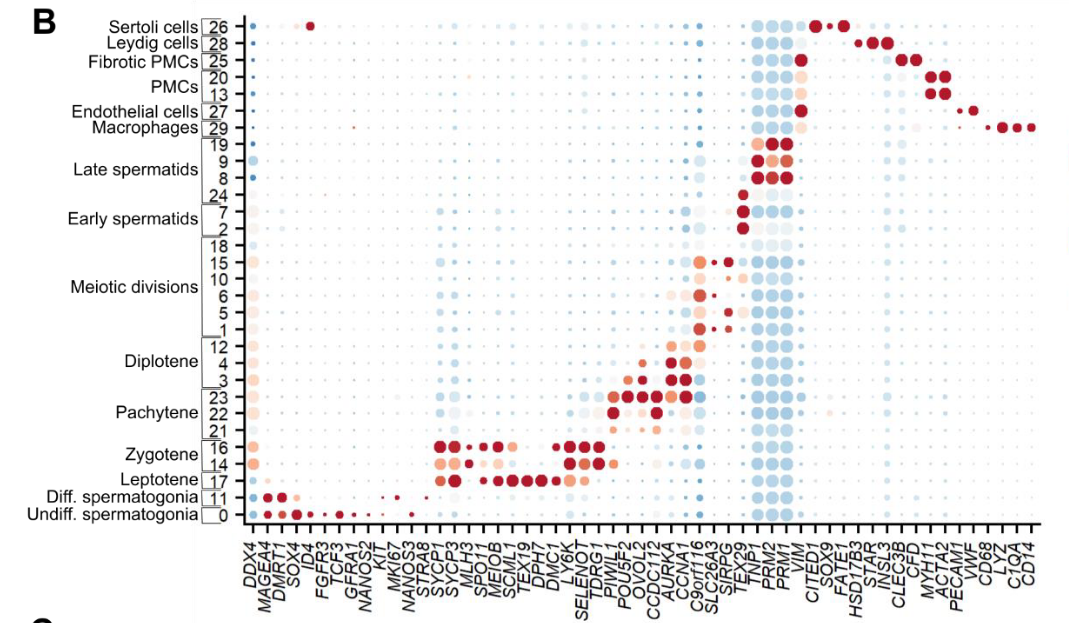

# Extra

In [ ]:
# Main markers for clustering at res = 0.25

#myoid_leydig_markers = ['DLK1', 'MYH11', 'ACTA2'] # Cluster 0

# myoid_leydig_markers = ['MYH11','ACTA2','DLK1','IGF1'] # Cluster 0
# endothelial_markers = ['PALMD', 'VWF', 'CDH5'] # Cluster 5
# macrophage_markers = ['CD14', 'CD163', 'S100A4'] # Cluster 6
# spermatid_markers = ['SPATA18', 'HOOK1', 'SPATA12'] #cluster 1 (less) and cluster 3 ()
# sertoli_markers = ['SOX9', 'WT1'] # cluster 7
# immature_spermatid_markers = ['ZPBP', 'ZPBP2', 'SPAG6'] # Cluster 2
# spermatogonia_markers = ['UTF1', 'ID4', 'SOHLH1'] # Cluster 4


# spermatocytes ??
# myoid vs leydig ??



In [ ]:
# #calculate highly variable genes for dimensionality reduction
# res=[0.30,0.35,0.40,0.45,0.50]

# for i in range(1000,2000,500):
#     sc.pp.highly_variable_genes(adata2,n_top_genes=i) #may need to adjust n genes
#     adata_hvg = adata2[:, adata2.var['highly_variable']].copy()
   
#     for j in range (100,250,50):
#         sc.tl.pca(adata_hvg, svd_solver='arpack',n_comps=10)
        
#         for k in range (10,30,5):
#             sc.pp.neighbors(adata_hvg,n_neighbors=k)
#             sc.tl.umap(adata_hvg,spread=0.8 , min_dist=0.1)
        
#             for r in res:
#                 sc.tl.leiden(adata_hvg,resolution=r,n_iterations=-1)
#                 sc.pl.umap(adata_hvg,color=["leiden","samples"],cmap="plasma_r",show=False)
#                 plt.savefig("vgenes"+str(i)+"_ncomps"+str(j)+"_neighb"+str(k)+
#                         "_res"+str(r)+"UMAP.jpg", dpi=300)
                
#                 sc.tl.rank_genes_groups(adata_hvg,pts=True,groupby='leiden',n_genes=20,method='wilcoxon',corr_method='bonferroni')
#                 sc.tl.dendrogram(adata_hvg,groupby="leiden")
#                 sc.pl.rank_genes_groups_dotplot(adata_hvg,n_genes=5,groupby="leiden",color_map="plasma_r")
#                 plt.savefig("vgenes"+str(i)+"_ncomps"+str(j)+"_neighb"+str(k)+
#                         "_res"+str(r)+"DGE.jpg", dpi=300)
                
                

In [ ]:
# adata.var['mito_genes'] = adata.var_names.str.startswith('MT-')
# adata.var['ribo_genes'] = adata.var_names.str.startswith(('RBS','RPL'))
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mito_genes','ribo_genes'], percent_top=None, lop1p=False, inplace=True)
# upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
# lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
# adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
# adata = adata[(adata.obs.pct_counts_mito < 20)]
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# ssc.pp.higly_variable_genes(adata, )

